# **1: IMPORTAR LIBRERIAS/DATASETS Y REALIZAR ANÁLISIS EXPLORATORIO DE DATOS**



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import drive
drive.mount('/content/drive') #Debemos confirmar acceso a nuestra cuenta para el COLAB
#print(drive.mount)  #Imprime una direccion hexadecimal del apuntador a la carpeta drive
%cd "/content/drive/MyDrive/4DatosPractica"
%pwd
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/4DatosPractica
'21 SEP FINAL.csv'                        jugador.csv   ROC.png             UCI_Credit_Card.csv
'3 OCT EJERCICIO FINAL PARA PYTHON.csv'   player.csv    telecom_churn.csv


In [4]:
import numpy as np # Manipulación de arrays Multi-dimensionales
import pandas as pd # Manipulación de DataFrames
import matplotlib.pyplot as plt # Visualización de Datos
import seaborn as sns #Visualización de Datos
from sklearn import metrics


In [5]:
# Leer el fichero CSV
jugador_df = pd.read_csv("/content/jugador.csv")

In [6]:
# Cargar las 5 primeras observaciones
jugador_df.head()

,id,player,height,weight,college,age,two_points,two_point_percentage,fta,ast,pts,mayor500
0,0,Cliff Barker,188,83,University of Kentucky,29,102,37%,106,109,279,0
1,1,Ralph Beard,178,79,University of Kentucky,22,340,36%,282,233,895,1
2,2,Charlie Black,196,90,University of Kansas,28,226,28%,321,163,661,1
3,3,Nelson Bobb,183,77,Temple University,25,80,32%,131,46,242,0
4,4,Jake Bornheimer,196,90,Muhlenberg College,22,88,29%,117,40,254,0


In [7]:
# Cargar las 5 últimas observaciones
jugador_df.tail()

,id,player,height,weight,college,age,two_points,two_point_percentage,fta,ast,pts,mayor500
3065,3065,Okaro White,198,90,"California State University, Long Beach",25,209,47%,119,184,514,1
3066,3066,Isaiah Whitehead,198,90,"California State University, Long Beach",26,220,48%,114,228,538,1
3067,3067,Troy Williams,198,90,"California State University, Long Beach",27,253,54%,159,251,641,1
3068,3068,Kyle Wiltjer,198,90,"California State University, Long Beach",28,170,54%,104,125,427,0
3069,3069,Stephen Zimmerman,198,90,"California State University, Long Beach",29,34,43%,19,34,83,0


In [8]:
# Comprobar la dimensión del dataframe
jugador_df.shape

(3070, 12)

In [9]:
# Mostrar las columnas de las características
jugador_df.columns

Index(['id', 'player', 'height', 'weight', 'college', 'age', 'two_points',
       'two_point_percentage', 'fta', 'ast', 'pts', 'mayor500'],
      dtype='object')

In [10]:
# Obtener el resumen de los tipos de datos del dataframe
jugador_df.dtypes

,0
id,int64
player,object
height,int64
weight,int64
college,object
age,int64
two_points,int64
two_point_percentage,object
fta,int64
ast,int64


In [11]:
# Desplegar los detalles estadisticos del dataframe
jugador_df.describe()


,id,height,weight,age,two_points,fta,ast,pts,mayor500
count,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000
mean,1534.500000,198.041694,92.515309,26.445603,253.669055,174.998371,136.940717,639.156678,0.512704
std,886.376989,8.198711,9.203127,3.313451,209.493498,149.675414,126.829546,526.162488,0.499920
min,0.000000,173.000000,68.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,767.250000,193.000000,86.000000,24.000000,81.000000,56.000000,39.000000,203.250000,0.000000
50%,1534.500000,198.000000,93.000000,26.000000,207.500000,138.000000,102.500000,515.500000,1.000000
75%,2301.750000,203.000000,99.000000,29.000000,375.000000,254.750000,200.000000,946.750000,1.000000
max,3069.000000,218.000000,124.000000,41.000000,1159.000000,991.000000,1099.000000,2831.000000,1.000000


# **2: VISUALIZACION DE DATOS**


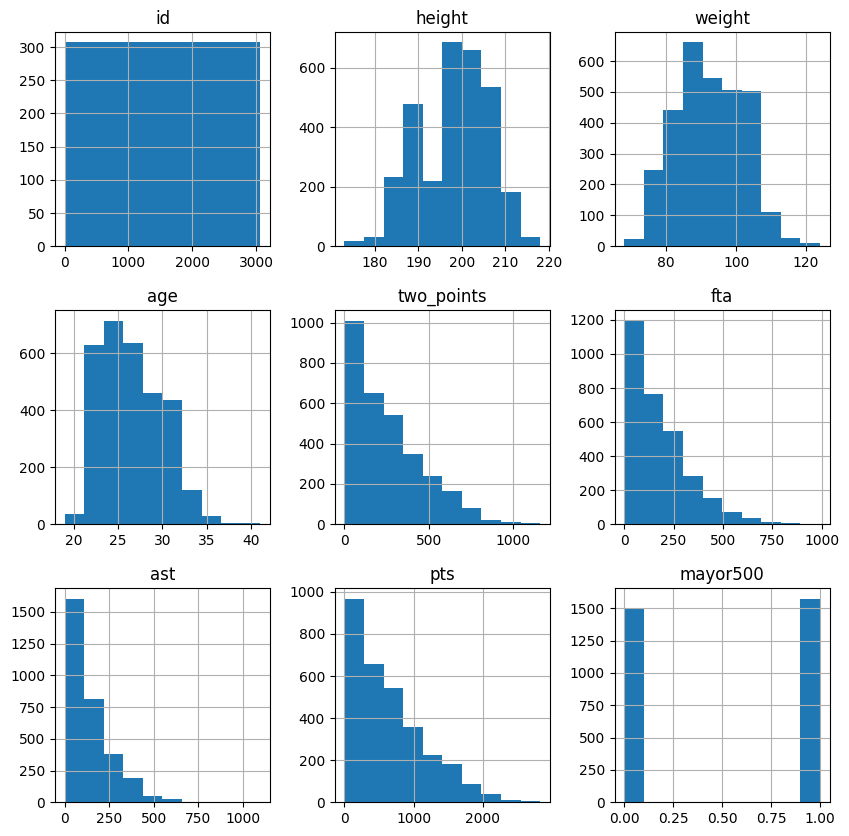

In [12]:
jugador_df.hist(figsize = (10, 10))
plt.show()

In [13]:
jugador_df["mayor500"].value_counts()

,count
mayor500,
1,1574
0,1496


<Axes: ylabel='count'>

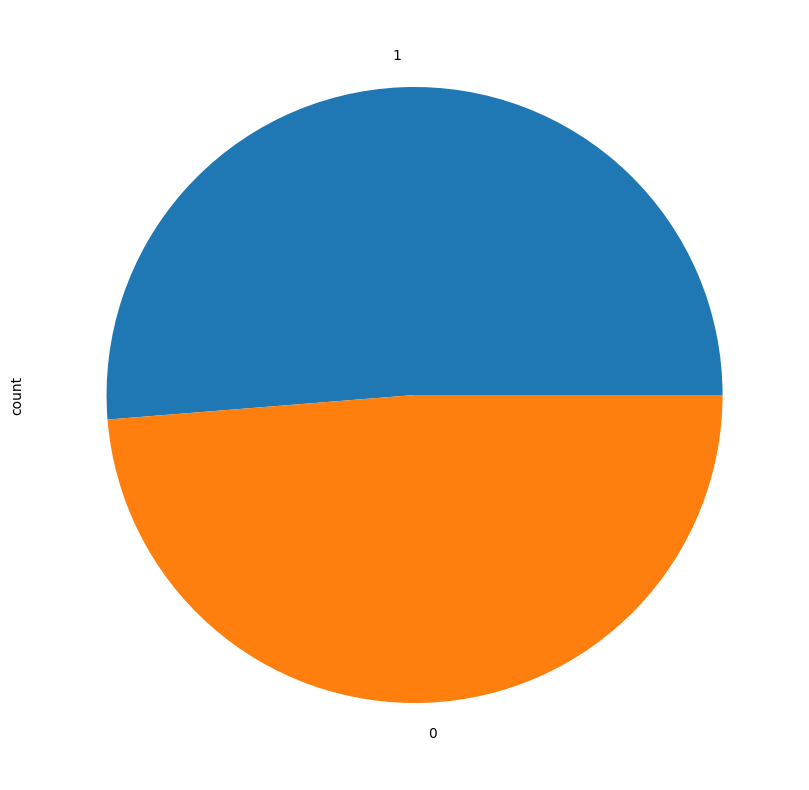

In [14]:
plt.figure(figsize = [10, 10])
jugador_df["mayor500"].value_counts().plot(kind='pie')

# **3: IDENTIFICAR LA IMPORTANCIA DE LAS CARACTERÍSTICAS Y PREPARAR LOS DATOS ANTES DEL ENTRENAMIENTO DEL MODELO**

In [15]:
jugador_df = jugador_df.select_dtypes(exclude = ['object'])
jugador_df.describe()

,id,height,weight,age,two_points,fta,ast,pts,mayor500
count,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000
mean,1534.500000,198.041694,92.515309,26.445603,253.669055,174.998371,136.940717,639.156678,0.512704
std,886.376989,8.198711,9.203127,3.313451,209.493498,149.675414,126.829546,526.162488,0.499920
min,0.000000,173.000000,68.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,767.250000,193.000000,86.000000,24.000000,81.000000,56.000000,39.000000,203.250000,0.000000
50%,1534.500000,198.000000,93.000000,26.000000,207.500000,138.000000,102.500000,515.500000,1.000000
75%,2301.750000,203.000000,99.000000,29.000000,375.000000,254.750000,200.000000,946.750000,1.000000
max,3069.000000,218.000000,124.000000,41.000000,1159.000000,991.000000,1099.000000,2831.000000,1.000000


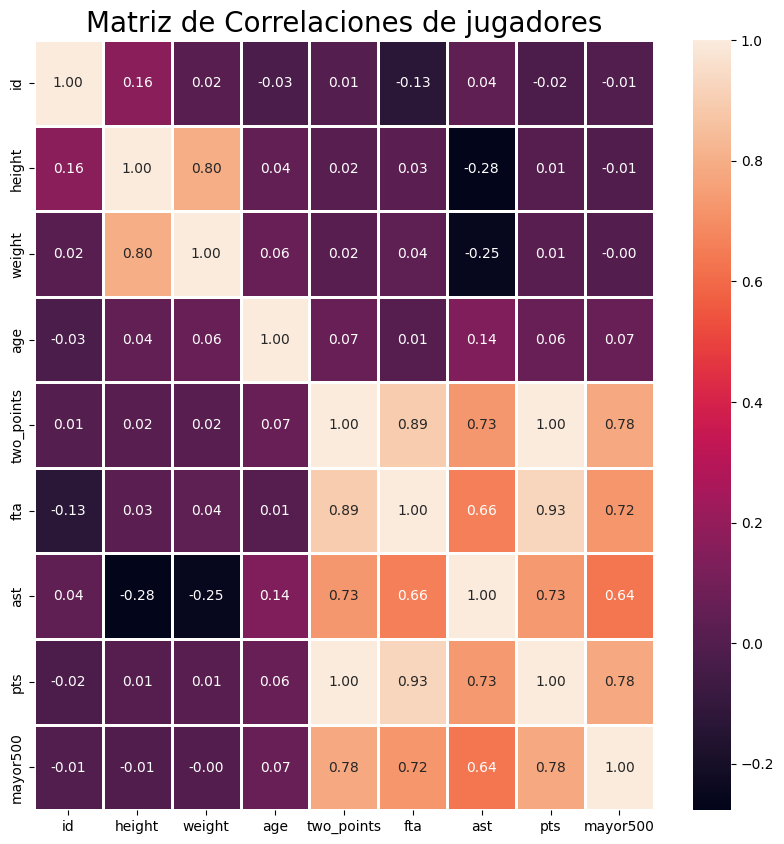

In [16]:
# Matriz de Jugadores
corr_matrix = jugador_df.corr()
plt.figure(figsize = (10, 10))
cm = sns.heatmap(corr_matrix,linewidths = 1,annot = True,fmt = ".2f")
plt.title("Matriz de Correlaciones de jugadores", fontsize = 20)
plt.show()

# Se muestra que "pts" tiene altas correlacionados.


In [17]:
# Las características innecesarias disminuirían la velocidad de entrenamiento, la interpretabilidad del modelo y el rendimiento de la generalización en los datos de prueba.
# Por lo tanto, es crucial encontrar y seleccionar las características más útiles en el conjunto de datos.
# Asignación de características de entrada a X y de salida a y

X = jugador_df.drop(["mayor500", "id"], axis = "columns") # area_code y phone_number son características irrelevantes para continuar con el entrenamiento del modelo
y = jugador_df["mayor500"]

In [18]:
X.shape
#Tenemos menos elementos..

(3070, 7)

In [19]:
X

,height,weight,age,two_points,fta,ast,pts
0,188,83,29,102,106,109,279
1,178,79,22,340,282,233,895
2,196,90,28,226,321,163,661
3,183,77,25,80,131,46,242
4,196,90,22,88,117,40,254
...,...,...,...,...,...,...,...
3065,198,90,25,209,119,184,514
3066,198,90,26,220,114,228,538
3067,198,90,27,253,159,251,641
3068,198,90,28,170,104,125,427


In [20]:
y.shape

(3070,)

In [21]:
# Realizar la división de entrenamiento/prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state =1228 ) #40% para pruebas y el resto 60% entrenamiento

In [22]:
X_train.shape

(1842, 7)

In [23]:
X_test.shape

(1228, 7)

In [24]:
from sklearn.ensemble import RandomForestClassifier #Algoritmos de conjunto/ensamblado

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel()) #que lo entrene y ajuste para predecir Y

RandomForestClassifier()

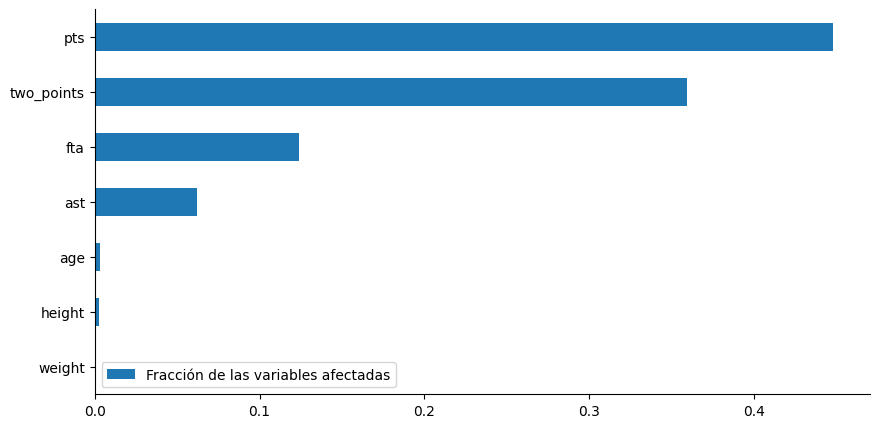

In [25]:
# Representar la importancia de las características, ¿cuales son las variables importantes?
feat_scores= pd.DataFrame({"Fracción de las variables afectadas" : rf.feature_importances_},index = X.columns) #Que tanto aporta esa variable al modelo
feat_scores= feat_scores.sort_values(by = "Fracción de las variables afectadas")#Ordenalas según la importancia.
feat_scores.plot(kind = "barh", figsize = (10, 5)) #hacemos un grafico de barras horizontal de la mas a la menos importante
sns.despine() #limita el eje x  y al contenido

El gráfico anterior es generado por el algoritmo Random Forest
El gráfico indica que "pts" encabeza la lista de características importantes seguido de "two_points" y así sucesivamente.

# **4: ENTRENAR Y EVALUAR UN CLASIFICADOR DE REGRESIÓN LOGÍSTICA**

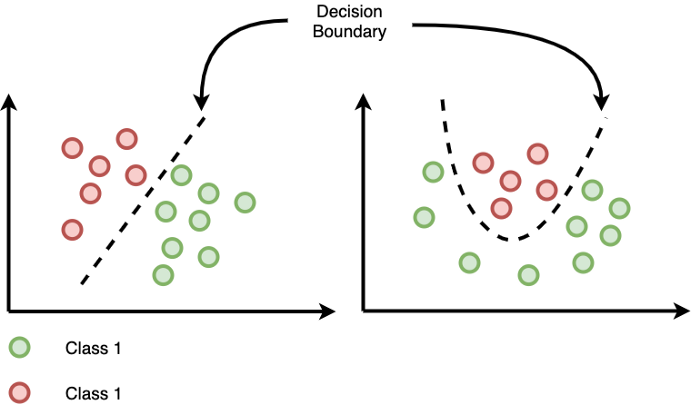

¿Qué es la Regresión Logística?

La regresión logística es un modelo estadístico utilizado principalmente para tareas de clasificación binaria, donde el objetivo es predecir una de dos posibles categorías, como sí/no, 0/1, o verdadero/falso. A pesar de su nombre, no se utiliza para tareas de regresión en el sentido tradicional, sino para modelar la probabilidad de que una instancia pertenezca a una clase.
¿Por qué entrenar y evaluar un clasificador de regresión logística?

    Modelar relaciones lineales en clasificación:
        La regresión logística se utiliza para modelar una relación entre un conjunto de características independientes (variables de entrada) y una variable dependiente (la clase objetivo) cuando esta última es categórica.
        Produce una curva sigmoide que asigna probabilidades a las clases, permitiendo tomar decisiones basadas en umbrales (generalmente 0.5).

    Aplicación en problemas binarios:
        La regresión logística es particularmente útil en problemas donde solo hay dos clases, como la determinación de si un cliente comprará un producto (sí/no) o la detección de fraude (fraude/no fraude).
        Proporciona una salida probabilística en lugar de una clasificación directa, lo que permite ajustar el umbral de decisión para diferentes aplicaciones (por ejemplo, en casos donde se necesita minimizar falsos positivos o falsos negativos).

    Fácil de interpretar:
        La regresión logística es fácil de entender y explicar, lo que la hace ideal para problemas donde se necesita interpretar los efectos de las características sobre la clase objetivo.
        Los coeficientes estimados pueden interpretarse como el impacto que tienen las variables independientes en la probabilidad de que ocurra un determinado resultado.

    Rendimiento en datos linealmente separables:
        Este clasificador es más efectivo cuando las clases pueden separarse aproximadamente por una línea o un hiperplano. Sin embargo, a diferencia de la regresión lineal, la salida está limitada entre 0 y 1, lo que lo hace adecuado para la clasificación.

Ventajas y Desventajas del Clasificador de Regresión Logística

Ventajas:

    Simple y eficiente para problemas de clasificación binaria.
    Interpretable: Los coeficientes pueden ayudar a entender la relación entre las características y la clase objetivo.
    Menos propenso al sobreajuste si se usa con regularización (penalización).

Desventajas:

    Limitado a problemas linealmente separables: Si las clases no se pueden separar linealmente, la regresión logística puede no ser adecuada sin transformaciones adicionales.
    No maneja bien clases no lineales: Otros clasificadores como SVM o redes neuronales pueden funcionar mejor en estos casos.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

modelo_LR = LogisticRegression()

modelo_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_predict = modelo_LR.predict(X_test)

In [28]:
print(classification_report(y_test, y_predict))
# La precisión es la relación TP/(TP+FP)
#    TP = Verdaderos Positivos
#    FP = Falsos Positivos
#    FN = Falsos Negativos
# El recall (recuperación) es la relación entre TP/(TP+FN)
# La puntuación F-beta puede interpretarse como una media armónica ponderada de la precisión y la recuperación.
# donde una puntuación F-beta alcanza su mejor valor en 1 y su peor puntuación en 0.


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       601
           1       0.99      0.99      0.99       627

    accuracy                           0.99      1228
   macro avg       0.99      0.99      0.99      1228
weighted avg       0.99      0.99      0.99      1228



**OPORTUNIDAD DE PRÁCTICA #3 [OPCIONAL]:**
- **Imprime la matriz de confusión y comenta los resultados**


<Axes: >

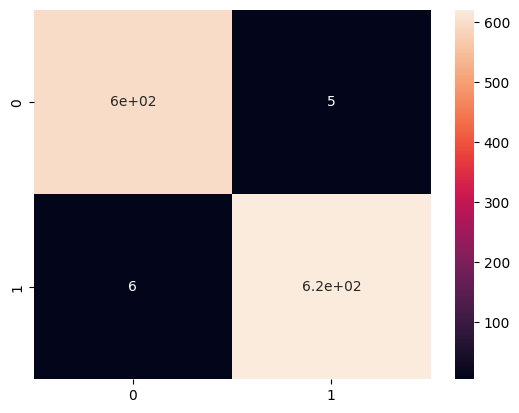

In [29]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# **5: ENTRENAR Y EVALUAR UN CLASIFICADOR DE MÁQUINA DE SOPORTE VECTORIAL**

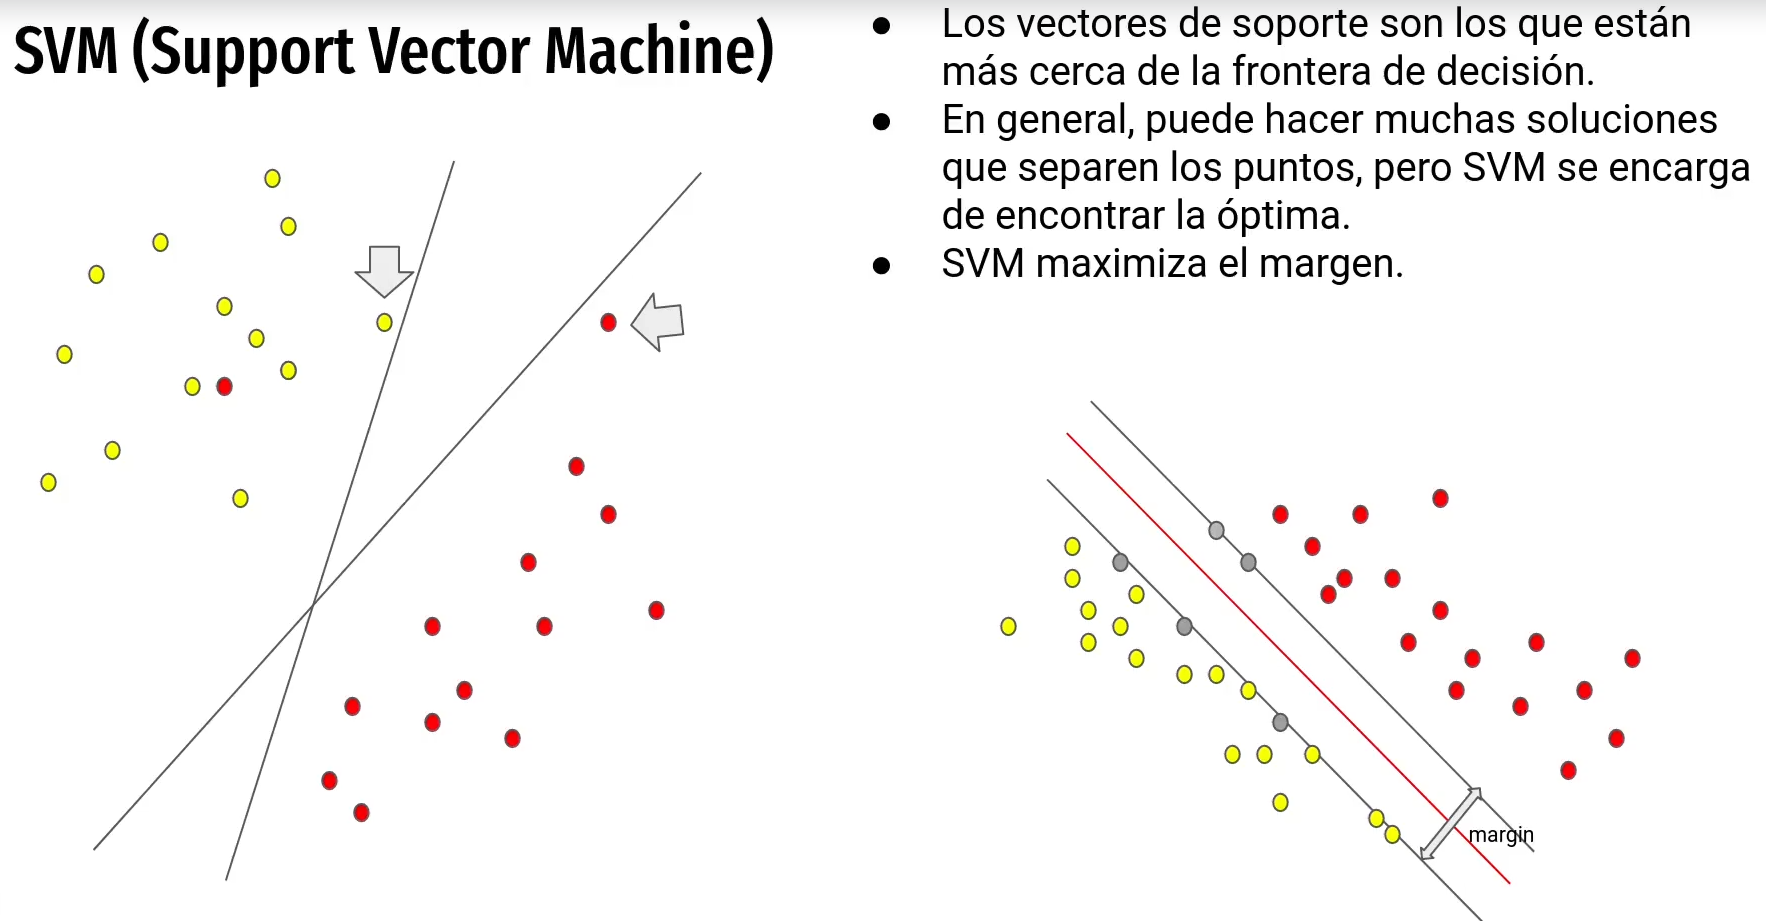

La Máquina de Soporte Vectorial (SVM, por sus siglas en inglés) es un algoritmo de aprendizaje supervisado utilizado tanto para problemas de clasificación como de regresión. El principal objetivo de SVM es encontrar un hiperplano óptimo que separe las diferentes clases en el espacio de características con el mayor margen posible.
Principio de Funcionamiento de SVM:

    Margen máximo: SVM intenta encontrar el hiperplano que maximiza la distancia (margen) entre los puntos de datos más cercanos de las dos clases. Esto reduce la posibilidad de error en la clasificación de los nuevos datos.
    Soportes vectores: Son los puntos de datos más cercanos al hiperplano. Estos puntos son esenciales para definir el margen y son los que realmente influyen en la posición del hiperplano.
    Hiperplanos: En un problema lineal de dos clases, el hiperplano es simplemente una línea que divide dos clases. En problemas de mayor dimensión, el hiperplano es un espacio de dimensión mayor.

Tipos de Clasificación con SVM:

    Clasificación lineal: Cuando los datos son linealmente separables, SVM puede trazar un hiperplano que separa las clases de manera precisa. Este hiperplano será una línea en 2D, un plano en 3D o un hiperplano en más dimensiones.
    Clasificación no lineal: Para los datos que no son linealmente separables, SVM utiliza trucos del núcleo (kernel trick), que transforma los datos en un espacio de mayor dimensión donde es más fácil separarlos linealmente.

¿Por qué Entrenar y Evaluar un Clasificador SVM?

Ventajas del SVM:

    Eficiencia en espacios de alta dimensionalidad: SVM es particularmente útil cuando el número de características (dimensiones) es muy grande en comparación con el número de muestras.
    Manejo de problemas no lineales: Con el uso de los trucos del núcleo, SVM puede resolver problemas complejos no lineales al transformar los datos en un espacio de mayor dimensión.
    Robustez: SVM es resistente al sobreajuste, especialmente en espacios de alta dimensión, debido a que se centra en los puntos más críticos (vectores de soporte).
    Capacidad de generalización: SVM es conocido por su buen rendimiento en tareas de clasificación y su habilidad para generalizar a nuevos datos.

Desventajas del SVM:

    Computacionalmente costoso: Para grandes conjuntos de datos, entrenar un SVM puede ser lento, tanto en términos de tiempo como de memoria.
    Difícil de interpretar: A diferencia de otros modelos como los árboles de decisión, los resultados de SVM no son fácilmente interpretables.

In [30]:
from sklearn.calibration import CalibratedClassifierCV # Para la salida de la puntuación de probabilidad
from sklearn.svm import LinearSVC #maquina de siporte vectorial lineal

modelo_svc = LinearSVC(max_iter=100000) #pero no 100 sino 100000 iteraciones para calibrar de hacer falta
modelo_svm = CalibratedClassifierCV(modelo_svc) #primero creamos el modelo, luego equilibrar
modelo_svm.fit(X_train, y_train) #Este ajustara al y_train

CalibratedClassifierCV(estimator=LinearSVC(max_iter=100000))

In [31]:
y_predict = modelo_svm.predict(X_test) #para hacer una prediccion, ya que no conoce la prediccion

In [32]:
print(classification_report(y_test, y_predict)) #teniendo la prediccion, imprimimos el valor real de y_test Vs la preduccion del modelo vectorial

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       601
           1       0.99      0.99      0.99       627

    accuracy                           0.99      1228
   macro avg       0.99      0.99      0.99      1228
weighted avg       0.99      0.99      0.99      1228



<Axes: >

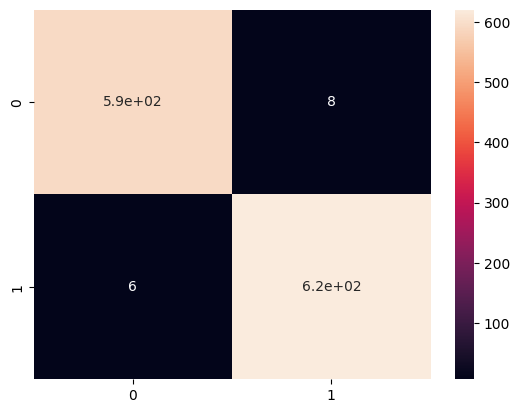

In [33]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# **6: ENTRENAR Y EVALUAR UN CLASIFICADOR DE BOSQUE ALEATORIO**

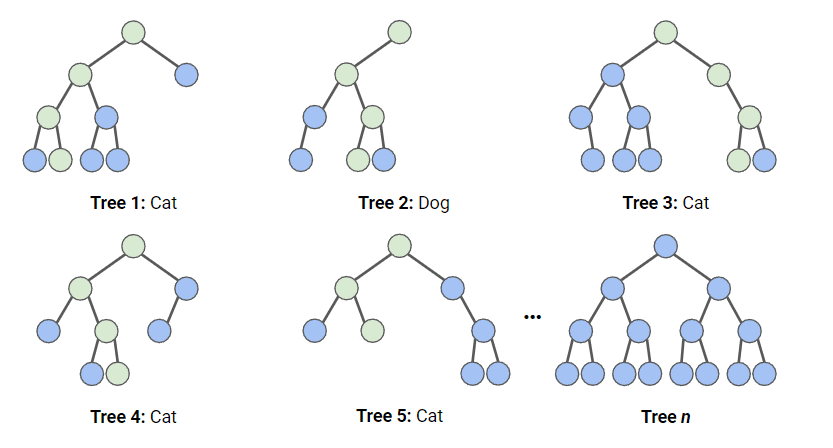

El algoritmo de Bosque Aleatorio (Random Forest) es uno de los más potentes y populares en el aprendizaje automático para tareas de clasificación y regresión. Este algoritmo pertenece a la familia de métodos de aprendizaje por conjuntos (ensemble learning), y es particularmente útil porque combina múltiples árboles de decisión, lo que mejora la precisión y la robustez del modelo. A continuación, explicaremos por qué es importante entrenar y evaluar un clasificador de Bosque Aleatorio.

Ventajas de Entrenar un Clasificador de Bosque Aleatorio

    Reducción del sobreajuste (overfitting):
        Los árboles de decisión individuales son propensos al sobreajuste, especialmente cuando el modelo es muy complejo. El Bosque Aleatorio, al combinar múltiples árboles de decisión, reduce este problema al promediar sus resultados, lo que genera un modelo más robusto y que generaliza mejor a nuevos datos.

    Mejor precisión:
        Al agregar múltiples árboles y promediar sus predicciones, el Bosque Aleatorio logra una mejor precisión en comparación con un solo árbol. Cada árbol tiene un sesgo diferente, pero al combinarse, el Bosque Aleatorio captura mejor las relaciones entre las variables.

    Manejo de datos desbalanceados:
        En problemas donde una clase es mucho más frecuente que otra (por ejemplo, detección de fraude), el Bosque Aleatorio puede manejar mejor estos desequilibrios utilizando ajustes de ponderación en las clases o por técnicas como el submuestreo o sobremuestreo.

    Robustez frente a ruido:
        El Bosque Aleatorio es menos susceptible al ruido en los datos, ya que los errores y variabilidad de los árboles individuales tienden a cancelarse mutuamente en el modelo agregado.

    Capacidad para trabajar con muchas características:
        En problemas de alta dimensionalidad (muchas variables), como el reconocimiento de imágenes o el análisis genómico, el Bosque Aleatorio puede seleccionar automáticamente las características más relevantes para mejorar el rendimiento del modelo.

    Interpretabilidad parcial:
        Aunque los modelos de Bosque Aleatorio son menos interpretables que un solo árbol de decisión, se pueden extraer medidas de importancia de características (feature importance), lo que brinda una idea de cuáles son las variables más importantes en el modelo.

Evaluación de un Clasificador de Bosque Aleatorio

Es crucial evaluar el rendimiento de cualquier modelo de aprendizaje automático para asegurarse de que está generalizando correctamente a nuevos datos. Al entrenar y evaluar un Bosque Aleatorio, se deben seguir estos pasos:

    División de los datos en entrenamiento y prueba:
        Los datos se dividen en dos conjuntos: uno para entrenamiento y otro para evaluación. Esto asegura que el modelo se pruebe en datos que no ha visto durante el entrenamiento, lo que permite medir su capacidad de generalización.

    Métricas de evaluación:
        En clasificación, se utilizan métricas como la precisión (accuracy), precisión por clase (precision), recall y F1-score. Estas métricas brindan información sobre cuántas predicciones fueron correctas, cuántos falsos positivos y falsos negativos generó el modelo, y qué tan balanceado es el rendimiento.
    
    Validación cruzada:

    La validación cruzada es una técnica que consiste en dividir los datos en varios subconjuntos o "folds" y entrenar y evaluar el modelo en diferentes combinaciones de esos subconjuntos. Esto proporciona una mejor estimación del rendimiento real del modelo.

Importancia de características:

    El Bosque Aleatorio permite medir la importancia de cada característica en la predicción final. Esta funcionalidad es clave para problemas donde se necesita interpretar qué variables están influyendo más en la decisión final.

In [34]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier() #por default trabaja con 100 arboles/estimadores
modelo_rf.fit(X_train, y_train) #apliquemos el método de entrenamiento

RandomForestClassifier()

In [35]:
y_predict = modelo_rf.predict(X_test)

In [36]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       601
           1       1.00      1.00      1.00       627

    accuracy                           1.00      1228
   macro avg       1.00      1.00      1.00      1228
weighted avg       1.00      1.00      1.00      1228



<Axes: >

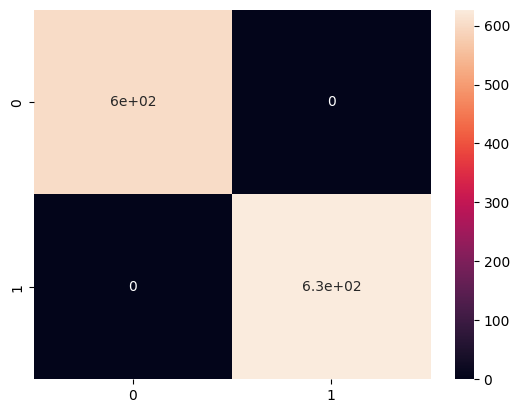

In [37]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# **7: ENTRENAR Y EVALUAR UN K-NEAREST NEIGHBOUR (KNN)**

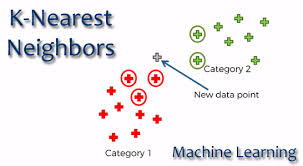

El K-Nearest Neighbour (KNN) es uno de los algoritmos de clasificación más simples pero efectivos en aprendizaje supervisado. Su premisa básica es que las instancias cercanas entre sí en el espacio de características tienden a pertenecer a la misma clase. KNN utiliza las distancias entre los puntos para hacer predicciones, clasificando una nueva instancia basándose en la mayoría de las clases de sus K vecinos más cercanos.

    K: El número de vecinos cercanos que se consideran para determinar la clase de un nuevo punto.
    Distancia: Para determinar la cercanía de los vecinos, se usan métricas de distancia como la Distancia Euclidiana, Manhattan, o Minkowski.

¿Por qué entrenar y evaluar un modelo KNN?

    Simplicidad y Eficiencia:
    KNN es fácil de implementar y entender, lo que lo hace ideal para estudiantes que están comenzando en machine learning. No tiene fases de entrenamiento complejas, ya que es un algoritmo de aprendizaje perezoso. Esto significa que simplemente almacena los datos de entrenamiento y luego clasifica nuevas instancias cuando se les presenta.

    No paramétrico:
    KNN no asume ninguna suposición sobre la distribución de los datos, lo que lo hace útil para una amplia variedad de problemas de clasificación y regresión. Esto lo diferencia de modelos como la Regresión Logística, que asumen una relación lineal entre las variables.

    Interpretabilidad:
    KNN ofrece una clasificación intuitiva: "Si un dato es similar a sus vecinos, pertenece a la misma clase". Los resultados son fáciles de interpretar y visualizar, especialmente con conjuntos de datos de baja dimensión.

    Evaluación del Modelo:
    Aunque KNN es fácil de implementar, es importante evaluar su rendimiento para asegurarse de que está haciendo predicciones precisas y generalizables. Al ajustar el valor de K y probar diferentes distancias, se puede mejorar la capacidad del modelo de hacer predicciones correctas. Además, debido a su dependencia de los datos locales, KNN puede sufrir de sobreajuste o subajuste, lo que hace necesaria una evaluación cuidadosa con métricas de rendimiento.

Entrenamiento del Modelo KNN

El entrenamiento en KNN es diferente de otros algoritmos porque, en realidad, no hay una fase de entrenamiento per se. El modelo simplemente almacena los datos y utiliza esa información cuando se le presentan nuevos ejemplos.

Pasos principales:

    Elegir un valor de K: Definir cuántos vecinos se considerarán para la clasificación.
    Definir una métrica de distancia: Generalmente, la distancia euclidiana es la más común, pero otras distancias como Manhattan pueden ser útiles según los datos.
    Clasificar por mayoría: Para cada instancia nueva, se calcula la distancia a todos los puntos de entrenamiento. Se seleccionan los K vecinos más cercanos y la clase mayoritaria es la predicción del modelo.

Evaluación del Modelo KNN

Evaluar un modelo KNN implica medir su rendimiento sobre datos no vistos mediante las siguientes métricas:

    Matriz de Confusión:
    Esto proporciona una visión clara de los verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN), y falsos negativos (FN). Es útil para entender cómo está clasificando el modelo los ejemplos de prueba.

    Precisión, Recall, F1-Score:
        Precisión mide la proporción de predicciones correctas de todas las instancias predichas como positivas.
        Recall mide la proporción de verdaderos positivos detectados correctamente.
        F1-Score es la media armónica entre la precisión y el recall, y es útil cuando las clases están desbalanceadas.

    Curva ROC y AUC:
    La curva ROC muestra la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos a diferentes umbrales de decisión. El AUC mide el área bajo la curva ROC y es un buen indicador de la capacidad del modelo para clasificar correctamente las instancias positivas y negativas.

    Cross-Validation:
    El uso de la validación cruzada ayuda a evaluar el modelo en diferentes particiones de los datos, reduciendo el riesgo de sobreajuste y proporcionando una medida más confiable del rendimiento.

Aspectos Importantes para el Rendimiento del KNN:

    Valor de K: Si el valor de K es demasiado bajo (por ejemplo, K=1), el modelo puede sobreajustarse a los datos de entrenamiento y ser muy sensible al ruido. Si es demasiado alto, puede subajustarse, volviéndose demasiado genérico.

    Escalado de Características: KNN es sensible a la escala de las características. Es importante normalizar o estandarizar los datos antes de aplicar KNN para que ninguna característica domine las otras debido a su rango.

In [38]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier() #por default trabaja con 5 vecinos.
modelo_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
y_predict = modelo_knn.predict(X_test)

In [40]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       601
           1       0.97      0.99      0.98       627

    accuracy                           0.98      1228
   macro avg       0.98      0.98      0.98      1228
weighted avg       0.98      0.98      0.98      1228



<Axes: >

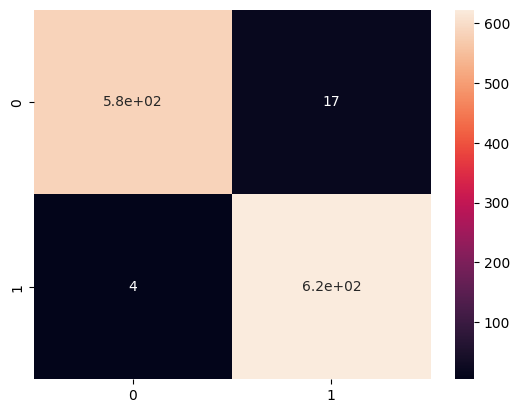

In [41]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# **8: ENTRENAR Y EVALUAR UN CLASIFICADOR NAIVE BAYES**

El algoritmo Naive Bayes es uno de los más simples y eficaces en problemas de clasificación, basado en el Teorema de Bayes. A pesar de sus suposiciones simplificadas, como la independencia entre las características, es un modelo sorprendentemente eficaz para ciertas tareas. A continuación, te presento los fundamentos teóricos de por qué es importante aprender y usar Naive Bayes en tus clases.

El algoritmo Naive Bayes se basa en el Teorema de Bayes, que calcula la probabilidad posterior de que una instancia pertenezca a una clase en función de las características observadas.

El teorema de Bayes se expresa como:
P(C∣X)=  [P(X∣C)⋅P(C) ] / P(X)


Donde:

    P(C∣X) es la probabilidad de que la clase sea CC dado el conjunto de características XX.
    P(X∣C) es la probabilidad de observar el conjunto de características XX dado que la clase es CC.
    P(C) es la probabilidad previa de la clase CC (probabilidad sin conocer los datos).
    P(X) es la probabilidad total de observar el conjunto de características XX.

El nombre Naive proviene de la suposición "ingenua" de que todas las características son independientes entre sí, lo cual rara vez es cierto en la realidad, pero permite simplificar los cálculos.

¿Por qué entrenar un clasificador Naive Bayes?

**a. Simplicidad y Velocidad**

Fácil de Implementar: Naive Bayes es sencillo de implementar y rápido de entrenar, incluso en grandes conjuntos de datos.
Bajo Costo Computacional: Al hacer la suposición de independencia entre las características, los cálculos se vuelven más sencillos, lo que reduce el tiempo de entrenamiento.

**b. Ideal para Text Mining y Clasificación de Documentos**

Naive Bayes es muy efectivo para tareas de clasificación de texto, como el filtrado de spam y la clasificación de sentimientos. Esto se debe a que los datos de texto se pueden representar como vectores de frecuencia de palabras, donde las palabras son las características.

Ejemplo: Clasificar correos como spam o no spam.

**c. Buen Rendimiento en Clases Desbalanceadas**

Naive Bayes maneja muy bien los datos desbalanceados, donde hay una clase dominante y otras minoritarias. La probabilidad de cada clase se toma en cuenta, y la influencia de las características prevalece sin que el tamaño de la clase distorsione el modelo.

**d. Funciona bien con datos ruidosos**

Aunque se basa en suposiciones simplificadas, Naive Bayes puede funcionar bien en problemas con ruido o cuando las características no tienen una dependencia fuerte entre sí. Es robusto frente a la sobreparametrización debido a su simplicidad.

Evaluación de un Clasificador Naive Bayes

**a. Métricas de Evaluación**

Una vez entrenado el modelo, se puede evaluar utilizando las siguientes métricas:

    Precisión: Qué porcentaje de las predicciones positivas fueron correctas.
    Recall: Qué porcentaje de los ejemplos positivos fueron correctamente identificados.
    F1-Score: Un balance entre precisión y recall.

Además, puedes utilizar la matriz de confusión para evaluar la clasificación correcta e incorrecta de cada clase.

**b. Tipos de Naive Bayes**

Existen varias variantes de Naive Bayes que se adaptan a diferentes tipos de datos:

    Gaussian Naive Bayes: Para características numéricas continuas (asume que las características siguen una distribución normal).
    Multinomial Naive Bayes: Para características discretas, muy útil en tareas de clasificación de texto donde se cuentan frecuencias de palabras.
    Bernoulli Naive Bayes: Adecuado para datos binarios, como presencia o ausencia de características (0 o 1).

In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
modelo_gnb = GaussianNB()
modelo_gnb.fit(X_train, y_train)

GaussianNB()

In [44]:
y_predict = modelo_gnb.predict(X_test)

In [45]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       601
           1       0.96      0.99      0.97       627

    accuracy                           0.97      1228
   macro avg       0.97      0.97      0.97      1228
weighted avg       0.97      0.97      0.97      1228



<Axes: >

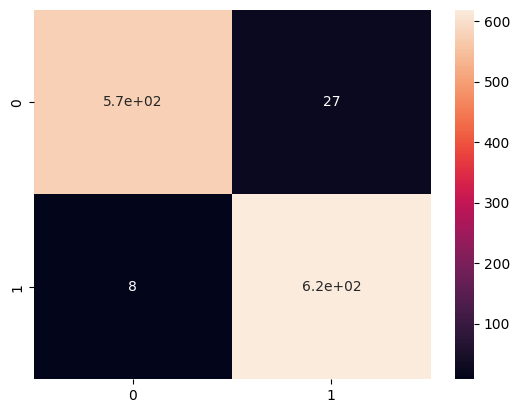

In [46]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

#9: COMPARACIÓN DE LOS MODELOS DE CLASIFICACIÓN ENTRENADOS Y OBSERVACIONES FINALES

Comprueba este enlace: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [47]:
modelo_LR.predict_proba(X_test)
# El primer elemento es la probabilidad de que la salida sea 0
# El segundo elemento es la probabilidad de que la salida sea 1

array([[1.00000000e+00, 9.54732760e-27],
       [1.00000000e+00, 2.23330089e-26],
       [1.00000000e+00, 3.02329823e-44],
       ...,
       [1.00000000e+00, 4.84972555e-17],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [48]:
modelo_LR.predict_proba(X_test)[:, 1]

array([9.54732760e-27, 2.23330089e-26, 3.02329823e-44, ...,
       4.84972555e-17, 1.00000000e+00, 1.00000000e+00])

In [49]:
y_test

,mayor500
1038,0
2515,0
159,0
921,1
2055,1
...,...
3017,1
3063,1
2896,0
1602,1


In [50]:
fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, modelo_LR.predict_proba(X_test)[:, 1], pos_label= 1)

In [51]:
fpr1

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00166389, 0.00166389, 0.00332779, 0.00332779, 0.00831947,
       0.00831947, 0.01164725, 0.01164725, 0.01830283, 0.01830283,
       0.01996672, 0.01996672, 0.0266223 , 0.0266223 , 0.03993344,
       0.03993344, 1.        ])

In [52]:
tpr1

array([0.        , 0.80063796, 0.80701754, 0.81180223, 0.81339713,
       0.81818182, 0.82137161, 0.82296651, 0.8261563 , 0.98405104,
       0.98405104, 0.98724083, 0.98724083, 0.99043062, 0.99043062,
       0.99202552, 0.99202552, 0.99362041, 0.99362041, 0.99521531,
       0.99521531, 0.99681021, 0.99681021, 0.9984051 , 0.9984051 ,
       1.        , 1.        ])

In [53]:
thresh1

array([           inf, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 9.97932050e-01, 9.97111006e-01, 9.85216298e-01,
       9.74558007e-01, 8.37793965e-01, 5.51737405e-01, 4.81587644e-01,
       3.56725587e-01, 3.35514479e-01, 2.23956293e-01, 2.16859870e-01,
       2.14755697e-01, 1.91943667e-01, 8.98086061e-02, 7.98356972e-02,
       1.09064198e-02, 1.01519808e-02, 4.90036609e-48])

In [54]:
# Curva ROC
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, modelo_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, modelo_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, modelo_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, modelo_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, modelo_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [55]:
# Puntuación AUC

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, modelo_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, modelo_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, modelo_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, modelo_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, modelo_gnb.predict_proba(X_test)[:, 1])

print("Regresión Logística: ", auc_score1) # Regresión Logística
print("Máquina de Soporte Vectorial: ", auc_score2) # Máquina de Soporte Vectorial
print("Bosque Aleatorio: ", auc_score3) # Bosque Aleatorio
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Regresión Logística:  0.999785047249799
Máquina de Soporte Vectorial:  0.999745241184947
Bosque Aleatorio:  1.0
K-Nearest Neighbors:  0.9972268441486412
Naive Bayes:  0.9966483293394581


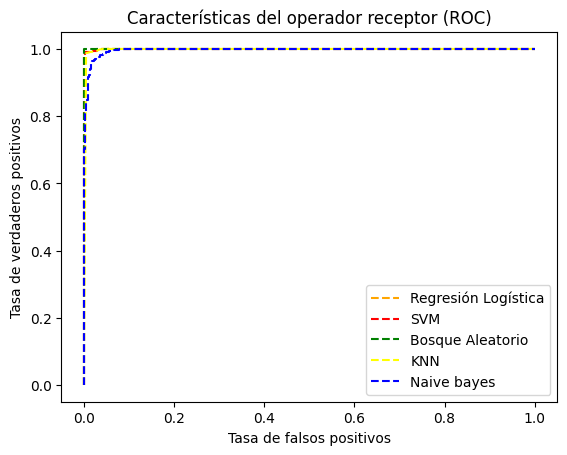

In [56]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Regresión Logística")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Bosque Aleatorio")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "blue", label = "Naive bayes")

plt.title('Características del operador receptor (ROC)')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

#CONCLUSIONES

El gráfico muestra que el algoritmo Random Forest obtuvo el mejor AUC. Por lo tanto, está claro que este modelo realizo un mejor trabajo a la hora de clasificar a jugadores con más de 500 pts.

In [57]:
y_predict = modelo_rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       601
           1       1.00      1.00      1.00       627

    accuracy                           1.00      1228
   macro avg       1.00      1.00      1.00      1228
weighted avg       1.00      1.00      1.00      1228

